In [14]:
# Load dependencies
import os, shutil
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
from capstone_funcs import visualize_filepath

#from project_functions import get_images, preprocess_dense_data, preprocess_cnn_data, visualize_results_cnn,\
 #                                visualize_training_results, get_class_weights, cnn_model

%load_ext autoreload
%autoreload 2
%matplotlib inline

TabError: inconsistent use of tabs and spaces in indentation (capstone_funcs.py, line 5)

In [7]:
# Filepaths
train_dir = 'dermoscopic_images/train'
test_dir = 'dermoscopic_images/test/' 

# Check functionality and num images
train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')
train_unknown_dir = os.path.join(train_dir, 'unknown')
train_normal_dir

test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')
test_unknown_dir = os.path.join(test_dir, 'unknown')

In [10]:
# Check number of files
print('There are', len(os.listdir(train_benign_dir)), 'benign images in the training set')
print('There are', len(os.listdir(train_malignant_dir)), 'malignant images in the training set')
print('There are', len(os.listdir(train_unknown_dir)), 'unknown images in the training set')
print('')
print('There are', len(os.listdir(test_benign_dir)), 'benign images in the testing set')
print('There are', len(os.listdir(test_malignant_dir)), 'malignant images in the testing set')
print('There are', len(os.listdir(test_unknown_dir)), 'unknown images in the testing set')

There are 2400 benign images in the training set
There are 1500 malignant images in the training set
There are 1500 unknown images in the training set

There are 600 benign images in the testing set
There are 600 malignant images in the testing set
There are 579 unknown images in the testing set


In [6]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

<ipython-input-12-a3b6e40039f6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(p*100))+'%' for p in ax.get_yticks()])


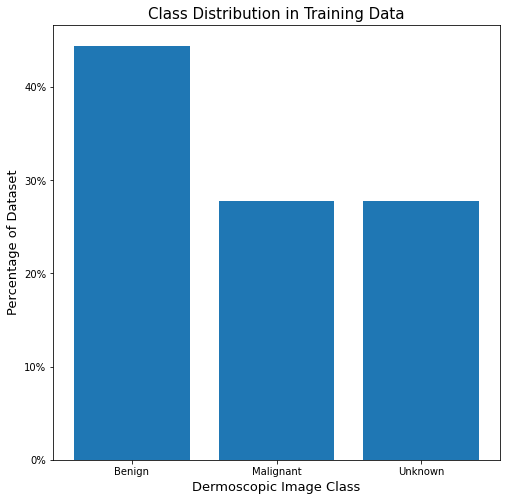

In [12]:
# Visualize class distribution in training data
total_images = len(os.listdir(train_benign_dir)) + len(os.listdir(train_malignant_dir)) + len(os.listdir(train_unknown_dir))
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(x=['Benign', 'Malignant', 'Unknown'], height=[len(os.listdir(train_benign_dir))/total_images, 
                                          len(os.listdir(train_malignant_dir))/total_images,
                                          len(os.listdir(train_unknown_dir))/total_images])
ax.set_title('Class Distribution in Training Data', size=15)
ax.set_ylabel('Percentage of Dataset', size=13)
ax.set_xlabel('Dermoscopic Image Class', size=13)
ax.set_yticklabels([str(int(p*100))+'%' for p in ax.get_yticks()])
plt.show()

In [13]:
train_benign_filepaths = [os.path.join(train_benign_dir, name) for name in os.listdir(train_benign_dir)]
train_malignant_filepaths = [os.path.join(train_malignant_dir, name) for name in os.listdir(train_malignant_dir)]
train_unknown_filepaths = [os.path.join(train_unknown_dir, name) for name in os.listdir(train_unknown_dir)]